### I selected the gun violence is US as my Capstone project.

The recent mass shootings in Texas and Ohio, along with a spate of shooting in Chicago, have brought another renewed attention to gun violence in US.
These shootings received plenty of headlines in the media. But, is that the only States & Cities contributed to total gun-related death in the country?
This project intends to find out if gun violence is epidemic in US and where are the “at-risk" areas.

### A site note:
The dataset used in this research was acquired from Kaggle.com

#### Another Site note:
A considerable amount of work required to clean-up the dataset to remove the irrelevant data. The outcome dataset was easy to understand and processed. Also, the new cleaned dataset only uses 1/3 of the PC memory compared to the original dataset.


In [22]:
import pandas as pd
import datetime
#import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
df = pd.read_csv('stage3Clean.csv')
print(df)

        incident_id       date           state city_or_county  \
0            461105   1/1/2013    Pennsylvania     Mckeesport   
1            460726   1/1/2013      California      Hawthorne   
2            478855   1/1/2013            Ohio         Lorain   
3            478925   1/5/2013        Colorado         Aurora   
4            478959   1/7/2013  North Carolina     Greensboro   
...             ...        ...             ...            ...   
239672      1083142  3/31/2018       Louisiana          Rayne   
239673      1083139  3/31/2018       Louisiana   Natchitoches   
239674      1083151  3/31/2018       Louisiana         Gretna   
239675      1082514  3/31/2018           Texas        Houston   
239676      1081940  3/31/2018           Maine   Norridgewock   

                                          address  n_killed  n_injured  \
0       1506 Versailles Avenue and Coursin Street         0          4   
1                    13500 block of Cerise Avenue         1          3 

In [3]:
cleanDF = df.drop(['incident_id', 'incident_url','source_url','incident_url_fields_missing', 'notes', 'participant_name','participant_relationship', 'participant_status',
       'participant_type', 'sources','address','congressional_district','gun_stolen','gun_type','incident_characteristics','latitude','location_description','longitude','n_guns_involved','participant_age','participant_age_group','participant_gender','state_house_district','state_senate_district'], axis = 1)

In [4]:
cleanDF.state.value_counts()

Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

In [5]:
cleanDF.head()

,date,state,city_or_county,n_killed,n_injured
0,1/1/2013,Pennsylvania,Mckeesport,0,4
1,1/1/2013,California,Hawthorne,1,3
2,1/1/2013,Ohio,Lorain,1,3
3,1/5/2013,Colorado,Aurora,4,0
4,1/7/2013,North Carolina,Greensboro,2,2


In [6]:
cleanDF.isnull().head()
#True means missing values exists

,date,state,city_or_county,n_killed,n_injured
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


Text(0.5, 1.0, 'Fatalities by states from 2013 - 2018')

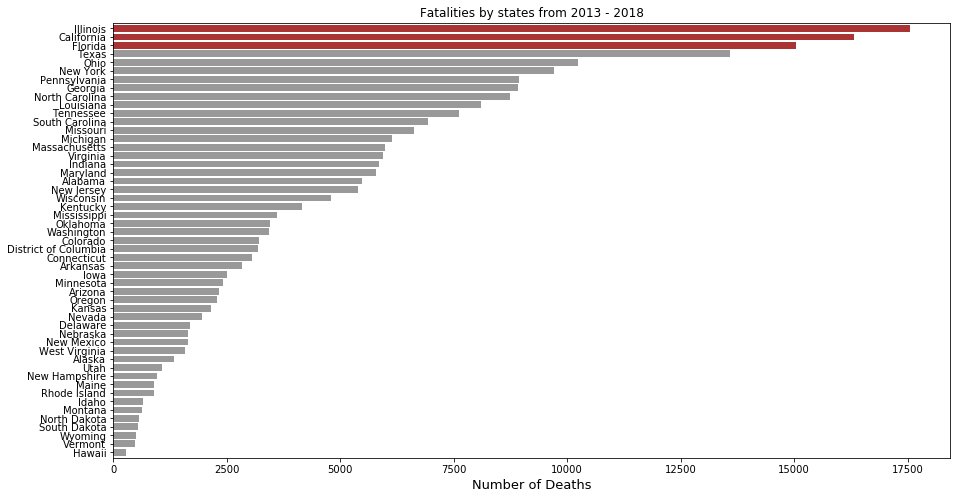

In [7]:
plt.xlabel('Number of Deaths',fontsize = 13)
df= cleanDF.state.value_counts(ascending=True)

ax = df.plot(kind='barh', figsize=(15,8),width=0.8, legend=False)

for bar in ax.patches:
    bar.set_facecolor('#999999')
    
highlight1 = 'Illinois'
highlight2 = 'Florida'
highlight3 = 'California'

pos1 = df.index.get_loc(highlight1)
pos2 = df.index.get_loc(highlight2)
pos3 = df.index.get_loc(highlight3)

ax.patches[pos1].set_facecolor('#aa3333')
ax.patches[pos2].set_facecolor('#aa3333')
ax.patches[pos3].set_facecolor('#aa3333')

plt.title('Fatalities by states from 2013 - 2018')


#### It is interesting to see that my home state topped this chart!!

In [8]:
#Cities that affected most with GV
city_counts = cleanDF.city_or_county.value_counts().head()
city_counts

Chicago         10814
Baltimore        3943
Washington       3279
New Orleans      3071
Philadelphia     2963
Name: city_or_county, dtype: int64

In [9]:
#By City - need to plot top 3 cities 
city_counts.describe()

count        5.000000
mean      4814.000000
std       3375.615351
min       2963.000000
25%       3071.000000
50%       3279.000000
75%       3943.000000
max      10814.000000
Name: city_or_county, dtype: float64

0         1
1         1
2         1
3         1
4         1
         ..
239672    3
239673    3
239674    3
239675    3
239676    3
Name: date, Length: 239677, dtype: int64


,index,date,state,city_or_county,n_killed,n_injured,month_date,year,month_year
0,0,1/1/2013,Pennsylvania,Mckeesport,0,4,1,2013,1-2013
1,1,1/1/2013,California,Hawthorne,1,3,1,2013,1-2013
2,2,1/1/2013,Ohio,Lorain,1,3,1,2013,1-2013
3,3,1/5/2013,Colorado,Aurora,4,0,1,2013,1-2013
4,4,1/7/2013,North Carolina,Greensboro,2,2,1,2013,1-2013
...,...,...,...,...,...,...,...,...,...
239672,239672,3/31/2018,Louisiana,Rayne,0,0,3,2018,3-2018
239673,239673,3/31/2018,Louisiana,Natchitoches,1,0,3,2018,3-2018
239674,239674,3/31/2018,Louisiana,Gretna,0,1,3,2018,3-2018
239675,239675,3/31/2018,Texas,Houston,1,0,3,2018,3-2018


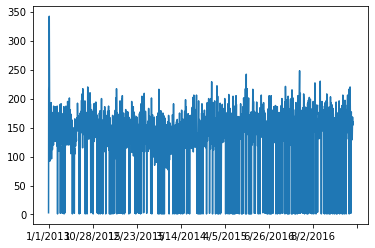

In [10]:
cleanDF.date.value_counts().sort_index().plot()
from datetime import datetime
print((pd.to_datetime(cleanDF['date']).dt.month))
cleanDF['month_date']= ((pd.to_datetime(cleanDF['date']).dt.month))
cleanDF['year']= ((pd.to_datetime(cleanDF['date']).dt.year))
cleanDF['month_year']= cleanDF['month_date'].astype(str) + "-" + cleanDF['year'].astype(str) 
cleanDF.reset_index()


In [11]:
# plot by n_killed vs date for frequency of distribution for the range of last 3 year or aggregate for top 3 cities
topStates = ['']
topStates = cleanDF.loc[:,('month_year','state', 'city_or_county', 'n_killed')]
topStates.head()


,month_year,state,city_or_county,n_killed
0,1-2013,Pennsylvania,Mckeesport,0
1,1-2013,California,Hawthorne,1
2,1-2013,Ohio,Lorain,1
3,1-2013,Colorado,Aurora,4
4,1-2013,North Carolina,Greensboro,2


In [12]:
topStates.tail()

,month_year,state,city_or_county,n_killed
239672,3-2018,Louisiana,Rayne,0
239673,3-2018,Louisiana,Natchitoches,1
239674,3-2018,Louisiana,Gretna,0
239675,3-2018,Texas,Houston,1
239676,3-2018,Maine,Norridgewock,2


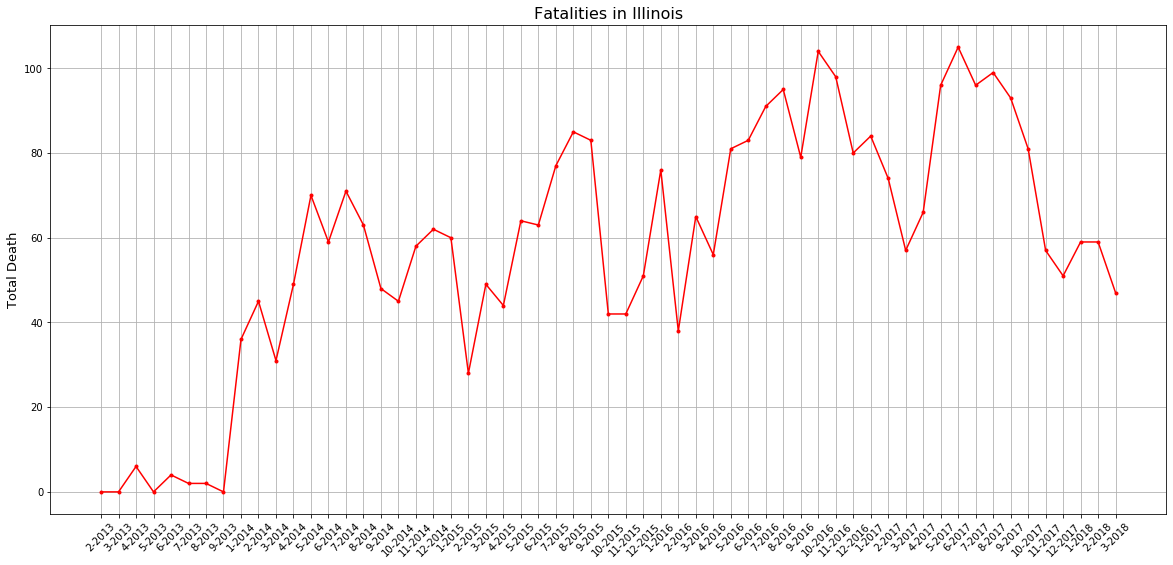

In [13]:

State =['Illinois']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Illinois', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(),color='r', marker='.')

plt.xticks(rotation = 45)
plt.grid(True)

plt.show()
plt.style.use('grayscale')

### 1st:Illinois

As you can see, in IL, the death toll kept raising, at one point, over 100 gun-related death reported; twice!
Red square on the chart marks these high points.
One thing to notice here is, the numbers goes down with the season. People don’t like to shoot each other when it is cold outside. However, when it gets warmer, SUN’s OUT, GUNs OUT.
Gang-related crimes tends to peak during the warmer climate. 

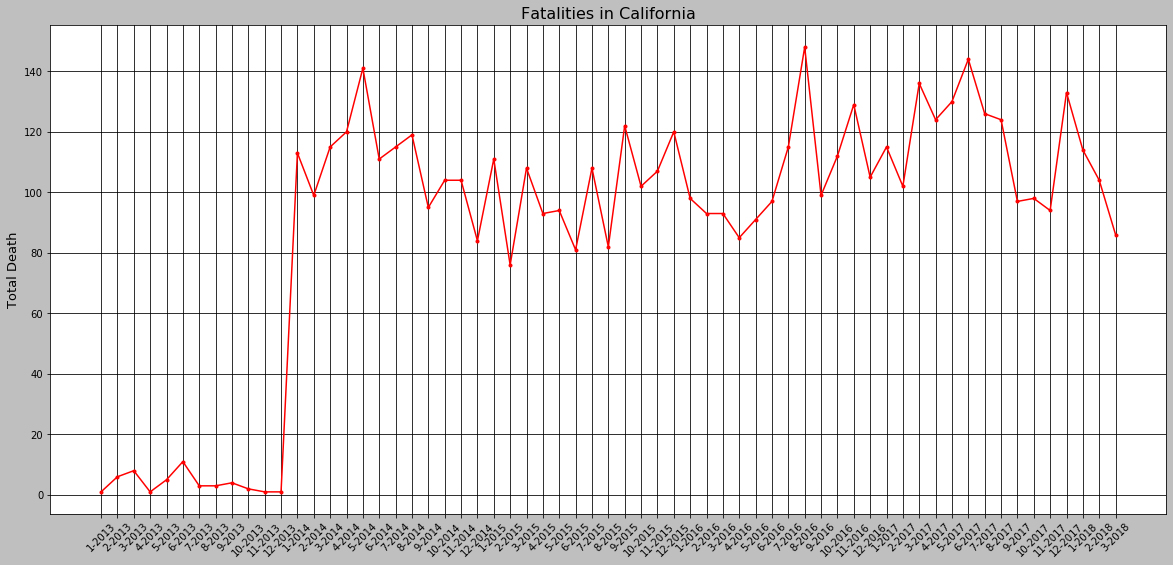

In [14]:

State =['California']
plt.figure(figsize = [20,9])
plt.title('Fatalities in California', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(), color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

### The 2nd state is California. 

It also has similar pattern as Florida. However, CA seems to suffer from a variety of factors:
1.	Gang related violence
2.	Religion related shootings or domestic terrorism and finally
3.	Several mass shootings such as in San Bernardino that killed 14 & 49 people died in Thousand Oaks in 2018.
Ok, so far, we look at the State level numbers. Now, lets drill down to the top 3 city level with most GV.
Here, it is logical to assume that the top 3 cities will correlate with top 3 states as we saw earlier.



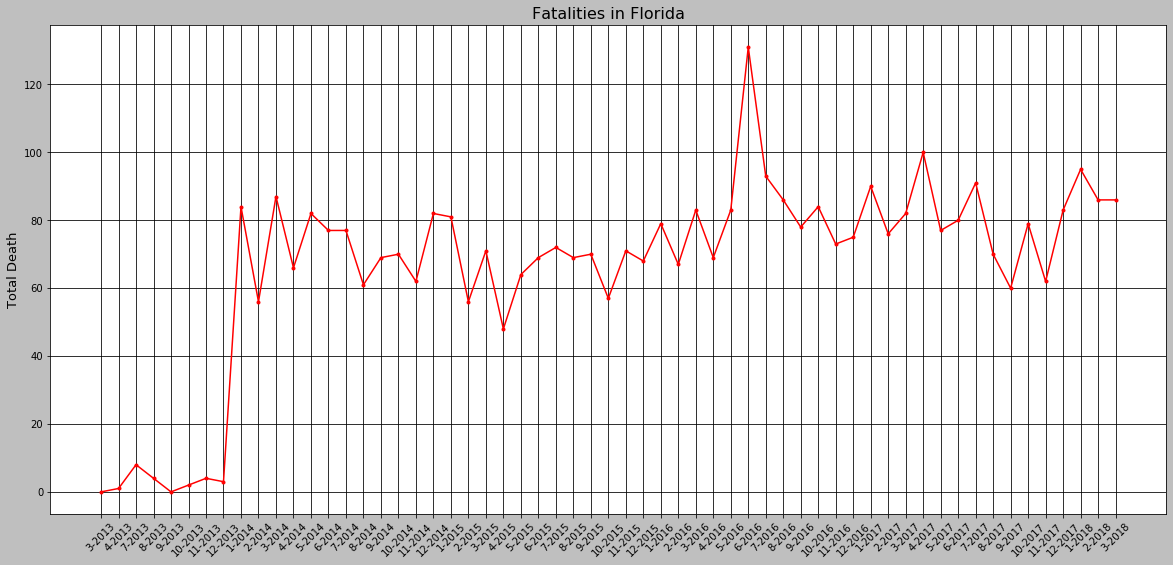

In [15]:

State =['Florida']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Florida', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
topStates.loc[topStates.state.isin(State)].groupby('month_year').sum()
plt.plot(topStates.loc[topStates.state.isin(State)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

### Let’s move on the 3rd state: Florida

This state is consistent when it comes to gun-related death for the past years.
The sharp peak at Jun-2016 is related to a mass shooting. The Pulse night-club shooting in Orlando alone left 49 people dead. It is the deadliest mass shooting in US history! 
Site Note: That record was broken in Oct-2017 when a lone-gunman pointed his rifle at concertgoers in Vegas killing 58.

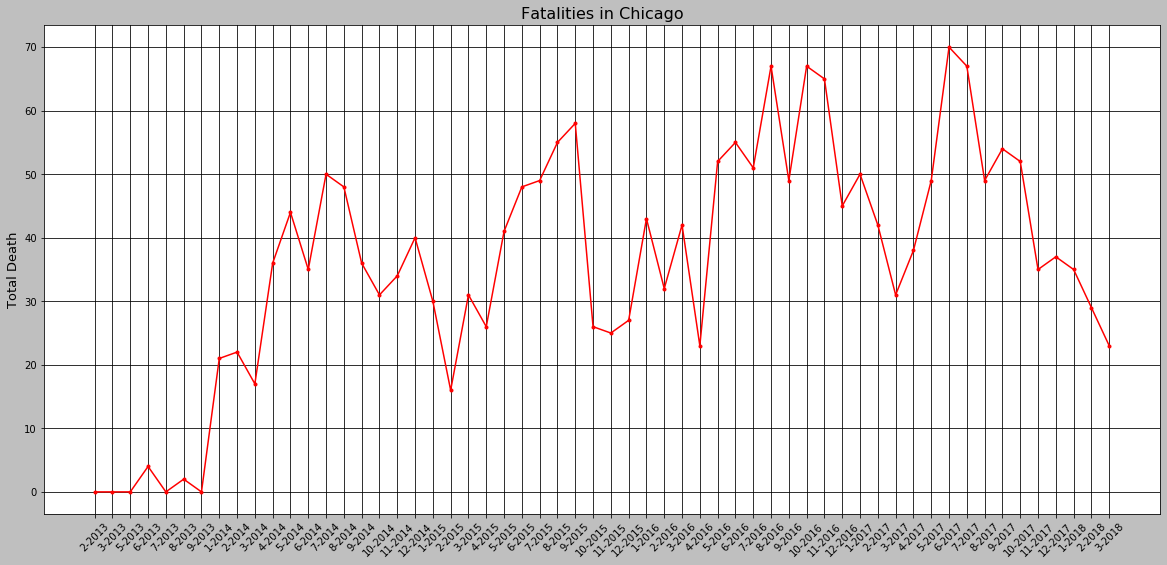

In [16]:

City =['Chicago']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Chicago', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

### The 1st City turns out to be Chicago.

Inline with my assumption earlier. Based on the plot, winter seems to slow the crime rate down. Part of the city with severe race segregation, wealth inequality & gangs has continued to fuel the gang violence.

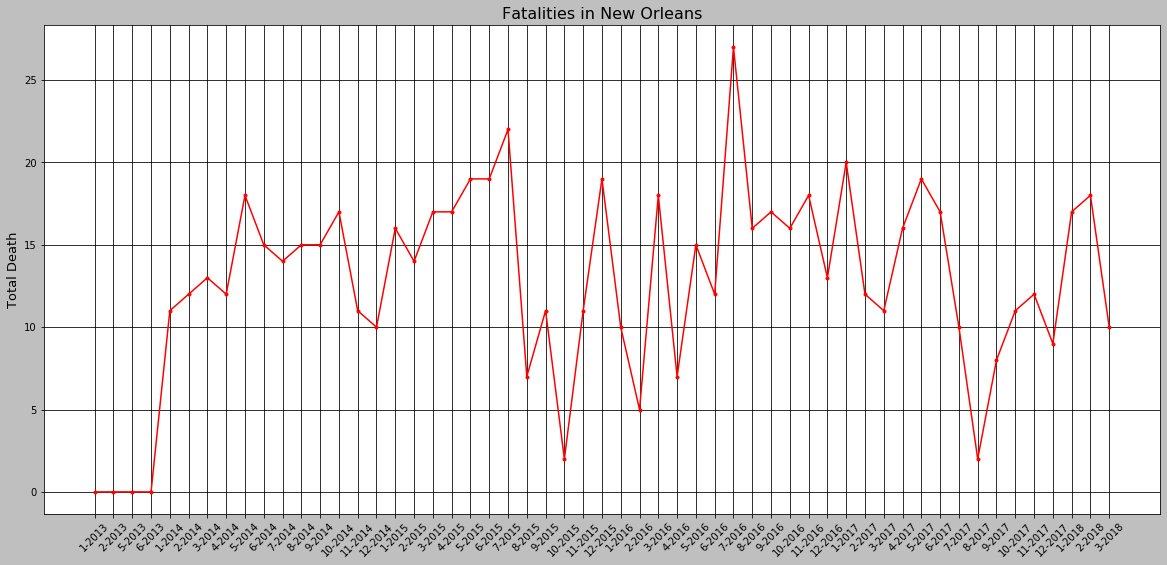

In [17]:

City =['New Orleans']
plt.figure(figsize = [20,9])
plt.title('Fatalities in New Orleans', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

### 2nd city is New Orleans!

Well, this is a surprise. Louisiana is at spot # 9 on the first chart. This city has been fighting to implement a “Commend-sense-law” for years to curb the GV. However, the legislator doesn’t see it that way, even after the Sandy Hook, Columbine mass shooting.
Turning 25 matters, is a commonly used slogan in Big Easy. 
A sharp spike in July-2016 is caused by retaliation between gangs that controls the drug traffic within the city district.


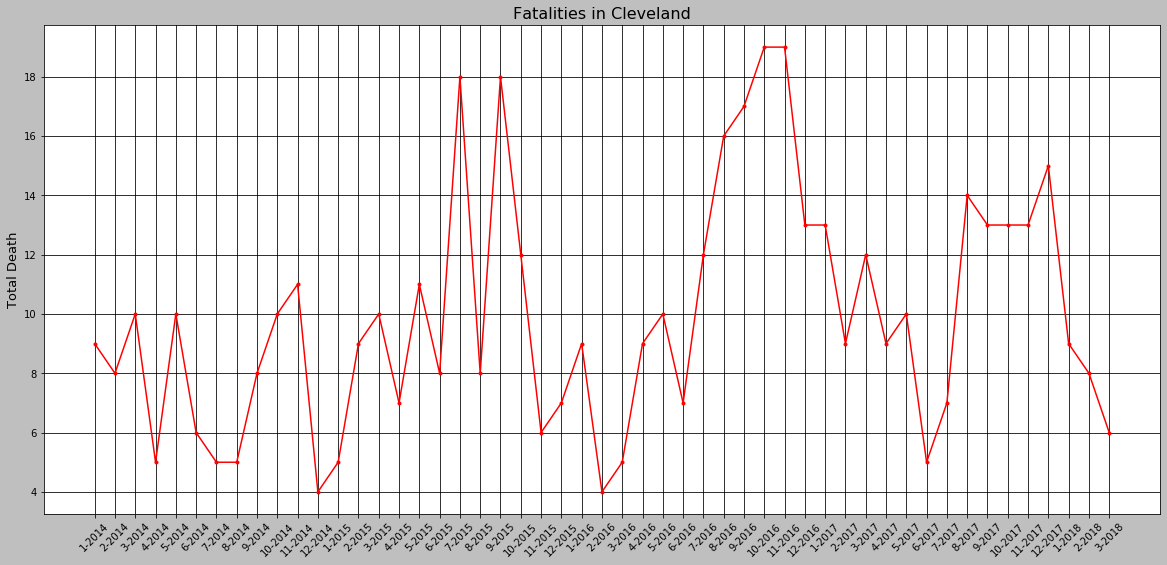

In [18]:

City =['Cleveland']
plt.figure(figsize = [20,9])
plt.title('Fatalities in Cleveland', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(topStates.loc[topStates.city_or_county.isin(City)].groupby('month_year',sort = False).sum(),color='r', marker='.')
plt.xticks(rotation = 45)
plt.grid(True)
plt.style.use('grayscale')
plt.show()

### Finally, Cleveland, another surprise!

Ohio is ranked at 4th on the first chart.
The spike in July-2015, Sept-2015 and Oct-2016 are the combination of homicides, suicides, accidental shooting and legal intervention or shot by police.
Retaliation between street gangs such as Heartless Felons and Quincy Boys had caused many children to die by gun shots.
Most of these gang members are between the age of 14 – 17 years old.
Continuously feeding the high school to jail pipeline.


In [19]:
CitiesDF = pd.read_csv('Cities_DF.csv')
Year = CitiesDF['month_year']
Cleveland_City_DF = CitiesDF['cleveland']
Chicago_City_DF = CitiesDF['chicago']
New_Orleans_City_DF = CitiesDF['New Orleans']

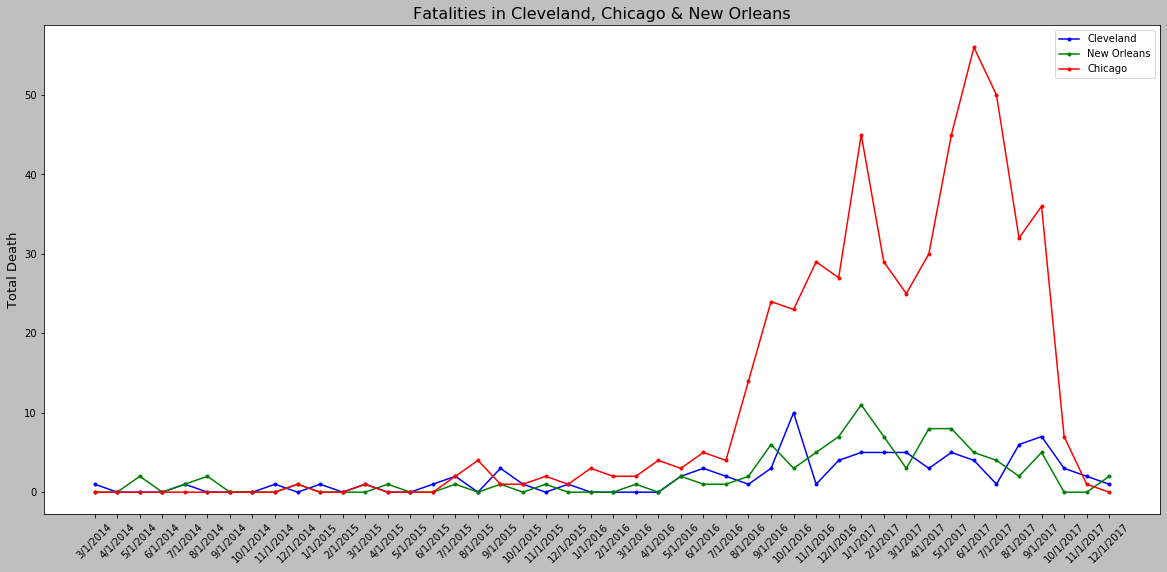

In [20]:
plt.figure(figsize = [20,9])
plt.title('Fatalities in Cleveland, Chicago & New Orleans', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(Year,Cleveland_City_DF,color='b',label = 'Cleveland', marker='.')
plt.plot(Year,New_Orleans_City_DF,color='g',label = 'New Orleans', marker='.')
plt.plot(Year,Chicago_City_DF,color='r',label = 'Chicago', marker='.')
plt.xticks(rotation = 45)
plt.legend()
plt.style.use('grayscale')

The plot above shows how the 3 cities mentioned above compare to each other. Chicago looks like a war zone compare to other two cities.

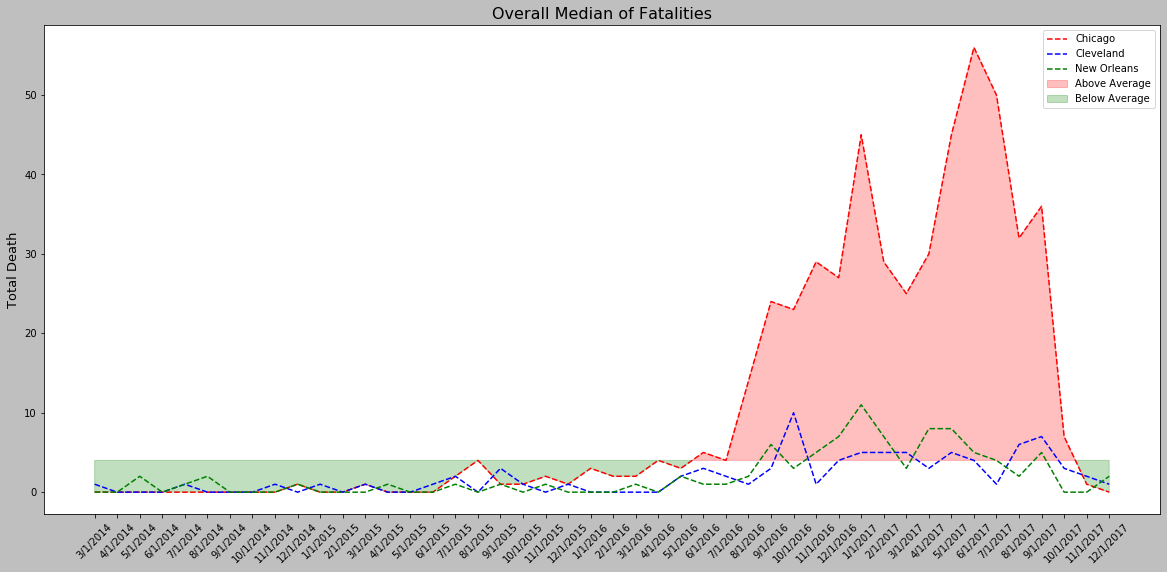

In [21]:
plt.figure(figsize = [20,9])
plt.title('Overall Median of Fatalities', fontsize = 16)
plt.ylabel('Total Death',fontsize = 13)
plt.plot(Year, Chicago_City_DF, color = 'r', linestyle='--', label='Chicago')
plt.plot(Year, Cleveland_City_DF, color = 'b',linestyle='--', label='Cleveland')
plt.plot(Year, New_Orleans_City_DF, color = 'g',linestyle='--',  label='New Orleans')
plt.xticks(rotation = 45)

overall_median = 4

#for abve average
plt.fill_between(Year,Chicago_City_DF, overall_median, 
                 where=(Chicago_City_DF > overall_median),interpolate=True,color='r',alpha=0.25, label='Above Average')
#for below average
plt.fill_between(Year,Chicago_City_DF, overall_median, 
                 where=(Chicago_City_DF < overall_median),interpolate=True,color='g', alpha=0.25, label='Below Average')
plt.legend()

The chart above shows how the 3 cities compare to the median. Green fill shows that the GV stayed below the median from March-2014 till April-2016. Red fill shows how the total death is above the median.

### Conclusion

The issue of gun violence is extremely complicated and varied across state laws and local culture. Many states support the notion that firearm regulation is a necessary measure in preventing and reducing gun deaths; however, many other states do not take this stance. While the facts may speak for themselves in the debate over gun violence, they don’t necessarily point toward a catch-all solution on their own. For example, State law such as Stand your Ground in Florida has caused many verbal arguments turns deadly. Such laws must be reviewed and amended to reduce escalation that lead to shootings. Poverty and gang activities has been the breeding ground for many senseless deaths with guns.


### Further Research and Analysis

Thousands of people die from firearms each year in the U.S. Suicides and homicides are the major contributor to this number. Legal intervention and accidental discharge of firearms are also factor into this.
Detail dataset and with the help of Data Science tools, we can further analyze the root cause contributing to gun violence. 
Specific measures can be deployed to address each of these issues individually and effectively.


### Assumptions

The total fatality use in this research includes homicide, gun suicides, law enforcement, and accidental shootings.